# Interactive data visualization

https://towardsdatascience.com/whats-wrong-with-covid-19-data-visualizations-and-how-to-fix-it-3cdc9adc774d



## Import libraries

In [8]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import pandas as pd 
import random
import math
import time
import datetime
from statistics import mean 
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)






Bad key "text.kerning_factor" on line 4 in
/home/emi/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


## Import the data (make sure you update this on a daily basis)

In [9]:
# New
# https://github.com/therealcyberlord/coronavirus_visualization_and_prediction/blob/master/coronavirus-covid-19-visualization-prediction.ipynb
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
latest_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/04-02-2020.csv')

# Spain data

In [127]:
spain_confirmed_df = confirmed_df[confirmed_df['Country/Region']=='Spain']
spain_deaths_df = deaths_df[deaths_df['Country/Region']=='Spain']
recoveries_df = recoveries_df[recoveries_df['Country/Region']=='Spain']

In [128]:
cols = spain_confirmed_df.keys()

Get all the dates for the outbreak

In [129]:
confirmed = spain_confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = spain_deaths_df.loc[:, cols[4]:cols[-1]]
recoveries = recoveries_df.loc[:, cols[4]:cols[-1]]

## Transpose data

In [130]:
# Transpose data
confirm_trans = confirmed.transpose()
recoveries_trans = recoveries.transpose()
deaths_trans = deaths.transpose()

In [144]:
# Rename column

confirm_trans.rename(columns={ confirm_trans.columns[0]: "y" }, inplace = True)
recoveries_trans.rename(columns={ recoveries_trans.columns[0]: "y" }, inplace = True)
deaths_trans.rename(columns={ deaths_trans.columns[0]: "y" }, inplace = True)


## Filtering data

The first significant date with data is '3/1/20', so let

In [184]:
first_day = '3/1/20'
last_day = confirm_trans.index[-1]
print(first_day, last_day)
# Confirmed cases
confirm_trans_filter = confirm_trans.loc[first_day:last_day]

# Recovered cases
recoveries_trans_filter = recoveries_trans.loc[first_day:last_day]

# Death cases
deaths_trans_filter = deaths_trans.loc[first_day:last_day]

# Counting days
n_days = confirm_trans_filter.count()

3/1/20 4/6/20


## Daily deathcases progression

In [185]:
# Create column of difference between Nd changes and Nd-1 changes
deaths_trans_filter['Growth Factor'] = ((deaths_trans_filter.y / deaths_trans_filter.y.shift(1)) - 1) * 100

#Reset index to new column
#deaths_trans_filter.reset_index(inplace=True)



/home/emi/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Linear interpolation


In [186]:
deaths_trans_filter.interpolate()

,y,Growth Factor
3/1/20,0,NaN
3/2/20,0,NaN
3/3/20,1,inf
3/4/20,2,100.000000
3/5/20,3,50.000000
3/6/20,5,66.666667
3/7/20,10,100.000000
3/8/20,17,70.000000
3/9/20,28,64.705882
3/10/20,35,25.000000


In [187]:
# Clean inf data
deaths_trans_filter['Growth Factor'] = deaths_trans_filter['Growth Factor'].replace(np.inf, 0)
deaths_trans_filter.fillna(0)

/home/emi/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,y,Growth Factor
3/1/20,0,0.000000
3/2/20,0,0.000000
3/3/20,1,0.000000
3/4/20,2,100.000000
3/5/20,3,50.000000
3/6/20,5,66.666667
3/7/20,10,100.000000
3/8/20,17,70.000000
3/9/20,28,64.705882
3/10/20,35,25.000000


In [ ]:
import plotly.express as px
import statsmodels.api as sm
#df = deaths_trans_filter['Growth Factor']
# Create x labels.
xlabel = deaths_trans_filter.index.values
yvalues = deaths_trans_filter["Growth Factor"]
fig = px.scatter(deaths_trans_filter, x=xlabel, y=yvalues, trendline="ols")
#fig = px.scatter(deaths_trans_filter, x=xlabel, y="Growth Factor", trendline="ols")
fig.show()

In [191]:
# Create x labels.
xlabel = deaths_trans_filter.index.values
print(type(xlabel))

<class 'numpy.ndarray'>


UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')

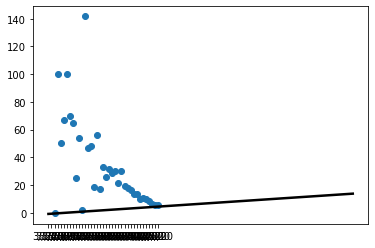

In [203]:
import matplotlib.pyplot as plt
import numpy as np

bill = xlabel
tip =  yvalues 
plt.scatter(bill, tip)

#fit function
f = lambda x: 0.1462*x - 0.8188
# x values of line to plot
x = np.array([0,100])
# plot fit
plt.plot(x,f(x),lw=2.5, c="k",label="fit line between 0 and 100")

#better take min and max of x values
x = np.array([min(bill),max(bill)])
plt.plot(x,f(x), c="orange", label="fit line between min and max")

plt.legend()
plt.show()